In [ ]:
pip install pyswarms

     |████████████████████████████████| 112kB 4.2MB/s 


In [ ]:
# Import modules
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
from IPython.display import Image
from sklearn import preprocessing

# Import PySwarms
import pyswarms as ps
import pyswarms.backend as P
from pyswarms.backend.swarms import Swarm
from pyswarms.backend.topology import Star
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#connect Google Drive directly to the Google Colab environment
from google.colab import drive
drive.mount('/content/drive')
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, 
and then re-execute this cell.


In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#OPEN FILE
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
file = pd.read_csv("/content/drive/MyDrive/BI project/Project Files/Preprocessed Data/Preprocessed_Data_With_Class_Encoded.csv")


,Sample-id,Class,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,?|340602,?|388795,?|390284,?|391343,?|391714,?|404770,?|441362,?|442388,?|553137,?|57714,?|645851,?|652919,?|653553,?|728045,?|728603,?|728788,?|729884,?|8225,?|90288,A1BG|1,A1CF|29974,A2BP1|54715,A2LD1|87769,A2ML1|144568,A2M|2,A4GALT|53947,A4GNT|51146,AAA1|404744,...,ZRANB1|54764,ZRANB2|9406,ZRANB3|84083,ZRSR2|8233,ZSCAN10|84891,ZSCAN12P1|221584,ZSCAN12|9753,ZSCAN16|80345,ZSCAN18|65982,ZSCAN1|284312,ZSCAN20|7579,ZSCAN21|7589,ZSCAN22|342945,ZSCAN23|222696,ZSCAN29|146050,ZSCAN2|54993,ZSCAN4|201516,ZSCAN5A|79149,ZSCAN5B|342933,ZSWIM1|90204,ZSWIM2|151112,ZSWIM3|140831,ZSWIM4|65249,ZSWIM5|57643,ZSWIM6|57688,ZSWIM7|125150,ZUFSP|221302,ZW10|9183,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
0,TCGA-3C-AAAU-01A-11R-A41B-07,2,0.0000,16.3644,12.9316,52.1503,408.0760,0.0,1187.0050,0.0000,0.0000,0.0,1.7233,0.3447,4.1359,0.0000,0.6893,0.0,0.0,0.0,3.7912,820.9773,124.4218,25.8494,289.5134,0.0,0.0,0.0000,109.6015,458.3962,40.6697,197.0897,0.0000,0.0000,102.9634,1.3786,5798.3746,68.2424,8.6165,0.3447,...,879.2247,2504.0842,72.0337,421.8624,2.7573,128.1786,141.6548,225.0622,132.3490,0.3447,158.8877,253.5104,300.8872,38.2571,960.2195,582.4734,0.3447,32.3979,1.0340,431.5128,0.3447,180.2566,489.4155,454.9496,621.7645,194.1084,89.9560,430.8235,415.8240,931.9575,129.5917,1007.7824,1658.4983,258.4941,1208.3738,3507.2482,1894.9342,1180.4565,1.7233,0.0000
1,TCGA-3C-AALI-01A-11R-A41B-07,2,0.0000,9.2659,17.3790,69.7553,563.8934,0.0,516.0413,1.0875,0.5438,0.0,144.1001,4.8940,1.6313,8.1566,0.5438,0.0,0.0,0.0,0.0000,708.5372,142.4687,13.3388,449.7009,0.0,0.0,0.0000,3.8064,683.5237,29.9076,237.3844,0.0000,0.0000,70.8646,4.3502,7571.9793,157.6944,0.5438,0.0000,...,566.0685,627.6563,62.5340,349.6465,0.0000,58.2164,91.8978,174.5514,1549.7553,18.4883,27.7325,698.5209,197.3899,7.0691,588.3632,236.5416,0.0000,127.7868,4.3502,507.3409,0.0000,139.2061,475.8021,113.6487,242.5231,217.1343,105.4921,340.4024,1161.3268,965.1985,59.8151,448.6134,1343.1213,198.4774,603.5889,5504.6221,1318.6514,406.7428,926.5905,0.0000
2,TCGA-3C-AALJ-01A-31R-A41B-07,2,0.9066,11.6228,9.2294,154.2974,1360.8341,0.0,592.0218,0.0000,0.0000,0.0,0.0000,2.7199,2.7199,0.0000,0.0000,0.0,0.0,0.0,0.9066,391.6591,34.4515,0.0000,1100.6346,0.0,0.0,0.9066,0.0000,657.2983,22.6655,423.2366,0.9066,0.0000,161.2602,0.0000,8840.3989,573.8894,0.0000,0.0000,...,1125.1133,1951.2149,35.3581,470.5349,0.0000,38.2684,99.7280,110.6074,2225.7480,112.4207,52.5839,282.8649,138.7126,46.2375,514.0526,268.3590,0.0000,62.5567,0.0000,352.6745,0.0000,81.5956,485.9474,180.4170,506.7996,164.2339,235.7208,304.6238,305.4216,2531.2783,35.3581,533.9982,768.8123,331.8223,532.1850,5458.7489,942.8830,509.5195,35.3581,0.0000
3,TCGA-3C-AALK-01A-11R-A41B-07,2,0.0000,12.0894,11.0799,143.8643,865.5358,0.0,552.7513,0.4137,0.0000,0.0,0.0000,2.0687,4.5511,0.0000,0.0000,0.0,0.0,0.0,0.0000,458.0058,15.7220,0.0000,406.2888,0.0,0.0,1.2412,34.7538,786.5122,54.1994,191.0178,0.0000,0.0000,62.5072,1.6549,10960.2193,506.4129,0.0000,0.0000,...,780.3062,1195.8295,61.2329,364.5014,0.8275,33.4506,211.8329,163.0120,1276.3757,6.2060,36.8225,300.6247,122.4659,26.4791,409.1849,304.9235,0.4137,57.5093,0.8275,286.3053,0.0000,67.0252,626.3964,107.5714,340.5048,196.1357,148.5312,314.0257,394.5056,668.5974,55.0269,437.7327,863.8808,175.4241,607.3645,5691.3529,781.1336,700.8688,66.6115,0.0000
4,TCGA-4H-AAAK-01A-12R-A41B-07,2,0.0000,6.8468,14.4298,84.2128,766.3830,0.0,260.8511,0.4255,0.0000,0.0,0.4255,2.9787,2.9787,0.0000,0.0000,0.0,0.0,0.0,0.4255,449.3617,14.4681,7.5915,92.7660,0.0,0.0,0.0000,2.1277,705.5319,53.6170,268.8809,0.4255,3.8298,154.3702,3.4043,9585.4426,342.1277,0.4255,0.4255,...,1118.7234,1423.4128,58.7234,305.1064,0.0000,31.6851,107.2340,136.1489,1567.2340,39.1489,73.1915,314.9234,160.0000,9.7872,297.4468,331.9149,0.4255,62.9787,1.7021,278.2979,

In [ ]:
file.shape
file

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#FORMAT DATA
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
new = file.loc[1:, 2:] # REAL DATA
X_train=np.array(new, dtype=np.float)

a = file.loc[:, 1] # REAL data
b = a[1:]
y=np.array(b, dtype=np.int64)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#SCALE DATA
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X_train)

(1095, 20531)

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#CREATE SWARM
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
n = X.shape[0] #number of particles
dim = X.shape[1] #number of dimensions
# generate a swarm with
init_positions = P.generate_swarm(n_particles=n, dimensions=dim, init_pos=X)
init_velocities = P.generate_velocity(n_particles=n, dimensions=dim)
my_options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
# Initialize the swarm
my_swarm = Swarm(position=init_positions, velocity=init_velocities, options=my_options)
#outputs of swarm
pos = my_swarm.position
vel = my_swarm.velocity
n_particles = my_swarm.n_particles
pbest = my_swarm.pbest_pos
pbest_cost = my_swarm.pbest_cost
best = my_swarm.best_pos
best_cost = my_swarm.best_cost

In [ ]:

from sklearn.svm import SVC

# Create an instance of the classifier
classifier =  SVC(kernel = 'linear', C=50, verbose = 30)

# Define objective function
def f_per_particle(m, alpha):
    total_features = n
    # Get the subset of the features from the binary mask
    if np.count_nonzero(m) == 0:
        X_subset = X
    else:
        X_subset = X[:,m==1]
    # Perform classification and store performance in P
    classifier.fit(X_subset, y)
    P = (classifier.predict(X_subset) == y).mean()
    # Compute for the objective function
    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))

    return j


In [ ]:
def f(x, alpha=0.88):
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], alpha) for i in range(n_particles)]
    return np.array(j)

In [ ]:
options = {'c1': 1.5, 'c2': 1.5, 'w':0.9, 'k': 20, 'p':2}

# Call instance of PSO
dimensions = dim

optimizer = ps.discrete.BinaryPSO(n_particles=20, dimensions=dimensions, options=options)

# Perform optimization
cost, pos = optimizer.optimize(f, iters=10, verbose=True)

2021-04-27 01:07:34,047 - pyswarms.discrete.binary - INFO - Optimize for 10 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.9, 'k': 20, 'p': 2}
pyswarms.discrete.binary:   0%|          |0/10

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

pyswarms.discrete.binary:  10%|█         |1/10, best_cost=-1.02

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

pyswarms.discrete.binary:  20%|██        |2/10, best_cost=-1.25

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

pyswarms.discrete.binary:  30%|███       |3/10, best_cost=-1.25

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

pyswarms.discrete.binary:  40%|████      |4/10, best_cost=-1.25

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

pyswarms.discrete.binary:  50%|█████     |5/10, best_cost=-1.25

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

pyswarms.discrete.binary:  60%|██████    |6/10, best_cost=-1.25

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

pyswarms.discrete.binary:  70%|███████   |7/10, best_cost=-1.25

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

pyswarms.discrete.binary:  80%|████████  |8/10, best_cost=-1.25

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

pyswarms.discrete.binary:  90%|█████████ |9/10, best_cost=-1.25

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

pyswarms.discrete.binary: 100%|██████████|10/10, best_cost=-1.25
2021-04-27 01:48:25,506 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: -1.2507397260273974, best pos: [0 0 0 ... 0 0 1]


[LibSVM]Subset performance: 1.000


In [ ]:
n_g_total = len(pos)
print("Initial number of features: ",n_g_total)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#FIND NUMBER OF FEATURES
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
n_global_feet = []
for x in pos:
    if x == 1:
        n_global_feet.append(x)
print("Number of selected features: ",len(n_global_feet))
selected_g_feet = len(n_global_feet)
percent_g_reduction = ((n_g_total-selected_g_feet)/n_g_total)*100
print("Percent of feature reduction: ",percent_g_reduction)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#SELECT FEATURES
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
global_feet = [1, 1]
for x in pos:
    if x == 1:
        global_feet.append(1)
    else:
        global_feet.append(None)

#print(len(global_feet))

Initial number of features:  20531
Number of selected features:  12508
Percent of feature reduction:  39.07749257220788


In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#CREATE WORKING FILE
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
working_file = pd.read_csv("/content/drive/MyDrive/BI project/Project Files/Preprocessed Data/Preprocessed_Data_With_Class_Encoded.csv")
working_file.to_csv("/content/drive/MyDrive/BROOKE/pso_working_file.csv", index=False)
data = pd.read_csv("/content/drive/MyDrive/BROOKE/pso_working_file.csv")
df = data.T
df.loc[:,"g_feet"] = global_feet

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#CREATE & FORMAT OUTPUT FILE
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
drop_null = df.dropna()
#print(drop_null)
drop_col = drop_null.drop(columns ='g_feet')
x = drop_col.T
x.to_csv("/content/drive/MyDrive/BROOKE/output_pso_feature_reduction.csv", index=False)

2021-04-27 01:49:55,831 - numexpr.utils - INFO - NumExpr defaulting to 2 threads.


In [ ]:
hi = pd.read_csv("/content/drive/MyDrive/BI project/Project Files/PSO/output_pso_feature_reduction.csv")

In [ ]:
hi.shape

(1095, 12463)

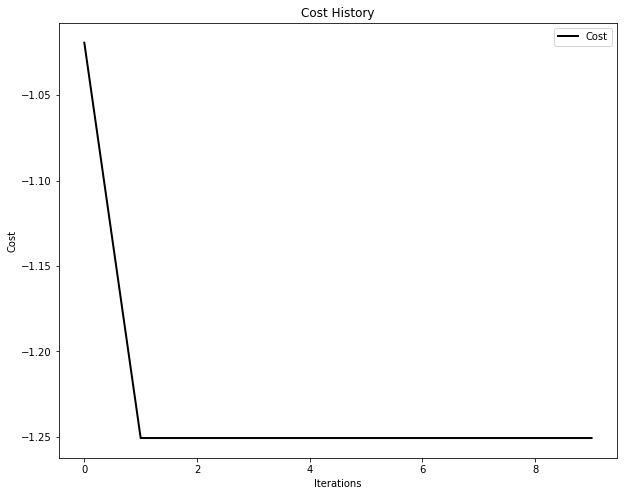